# Выпускная квалификационная работа по курсу «Data Science»
#Марков Петр

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## Провести разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [ ]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Пути для гугл драйв
# nb_path = '/content/drive/MyDrive/Colab Notebooks/'
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [ ]:
# Пути для локального запуска
nb_path = ''
data_path = '../data/'
models_path = '../models/'

In [84]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [ ]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


In [ ]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 1523

In [ ]:
# Загружаю исходные данные из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [ ]:
# Загружаю исходные данные из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит  10 признаков и 1023 строк.

X_nup содержит  3 признака и 1040 строк

Рассмотрю список признаков:

In [ ]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [ ]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

Дано, что это это единый набор данных, и он требует объединения с типом INNER. 


In [ ]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

В датасете осталось 1023 строки, часть строк из таблицы X_nup была отброшена.

In [ ]:
# Сохраню объединенные данные
df.to_excel('data_merged.xlsx')

In [ ]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Все признаки имеют тип float64, признаков с типом "object" нет - значит нет строковых значений вместо чисел.

In [ ]:
# Проверю на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

In [ ]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
#Описательная статистика
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

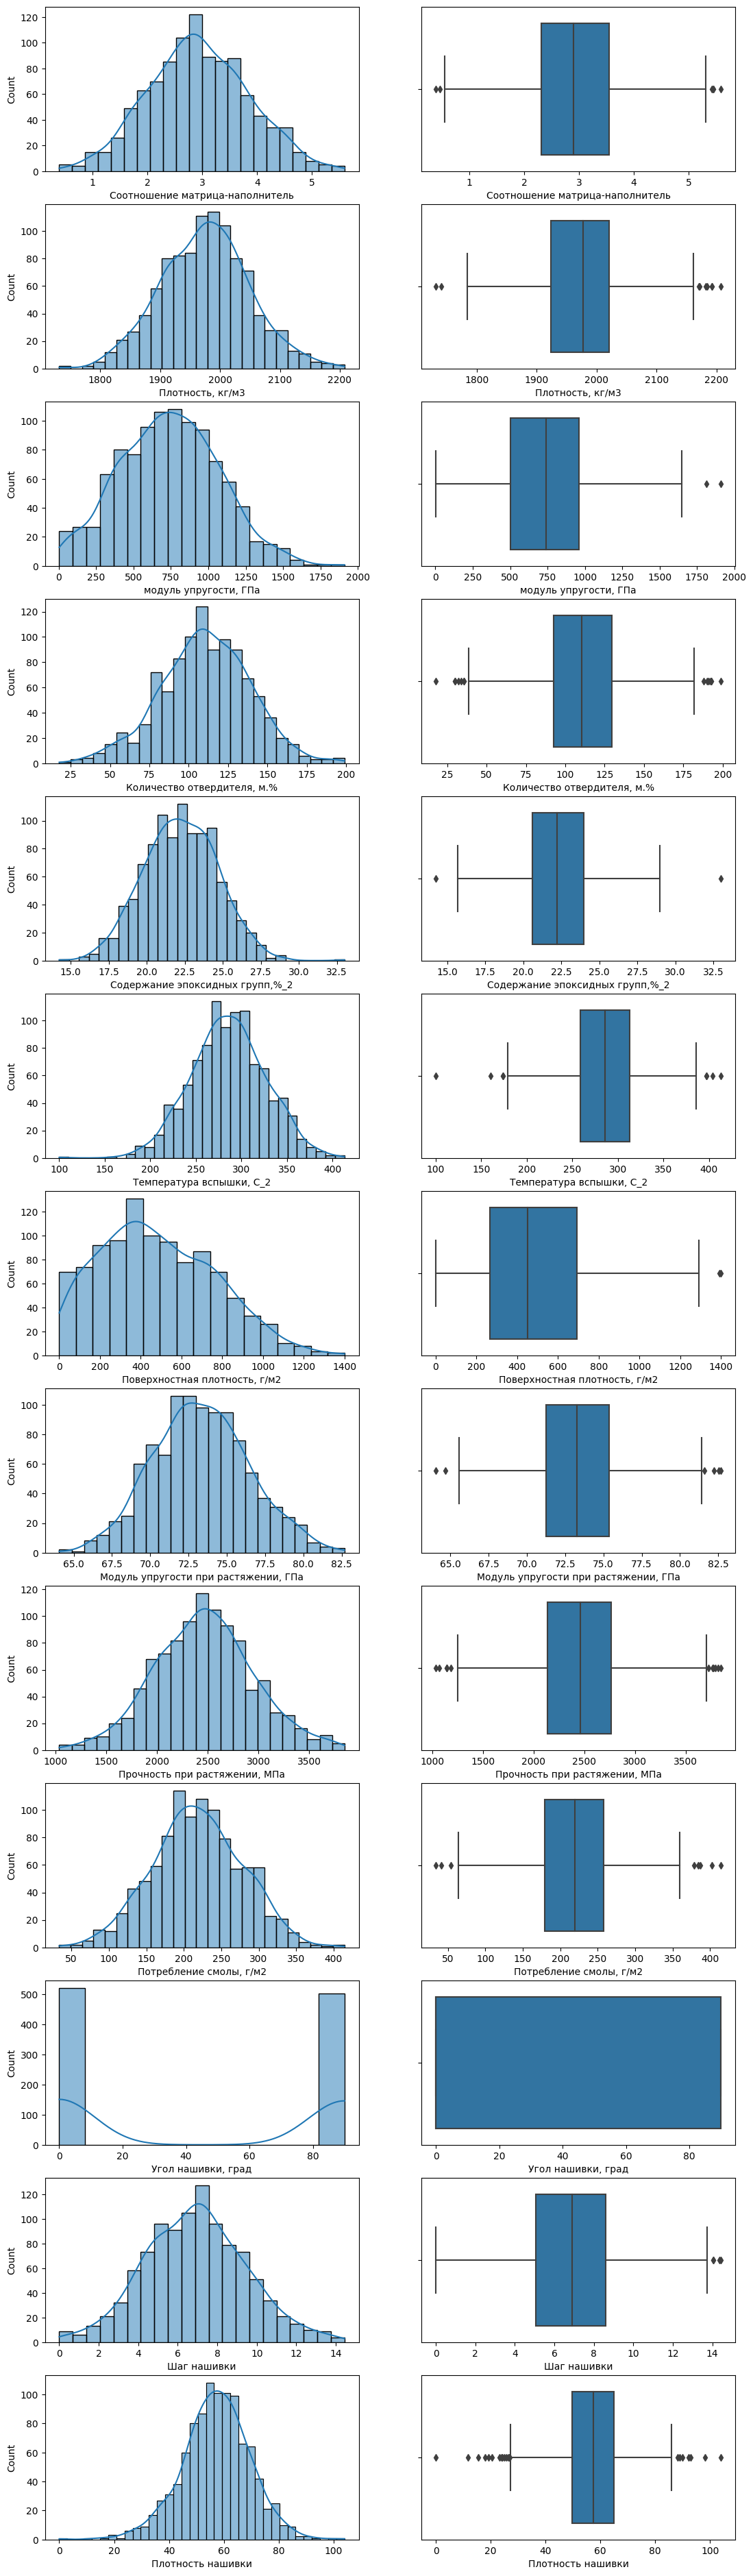

In [ ]:
# Построю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения

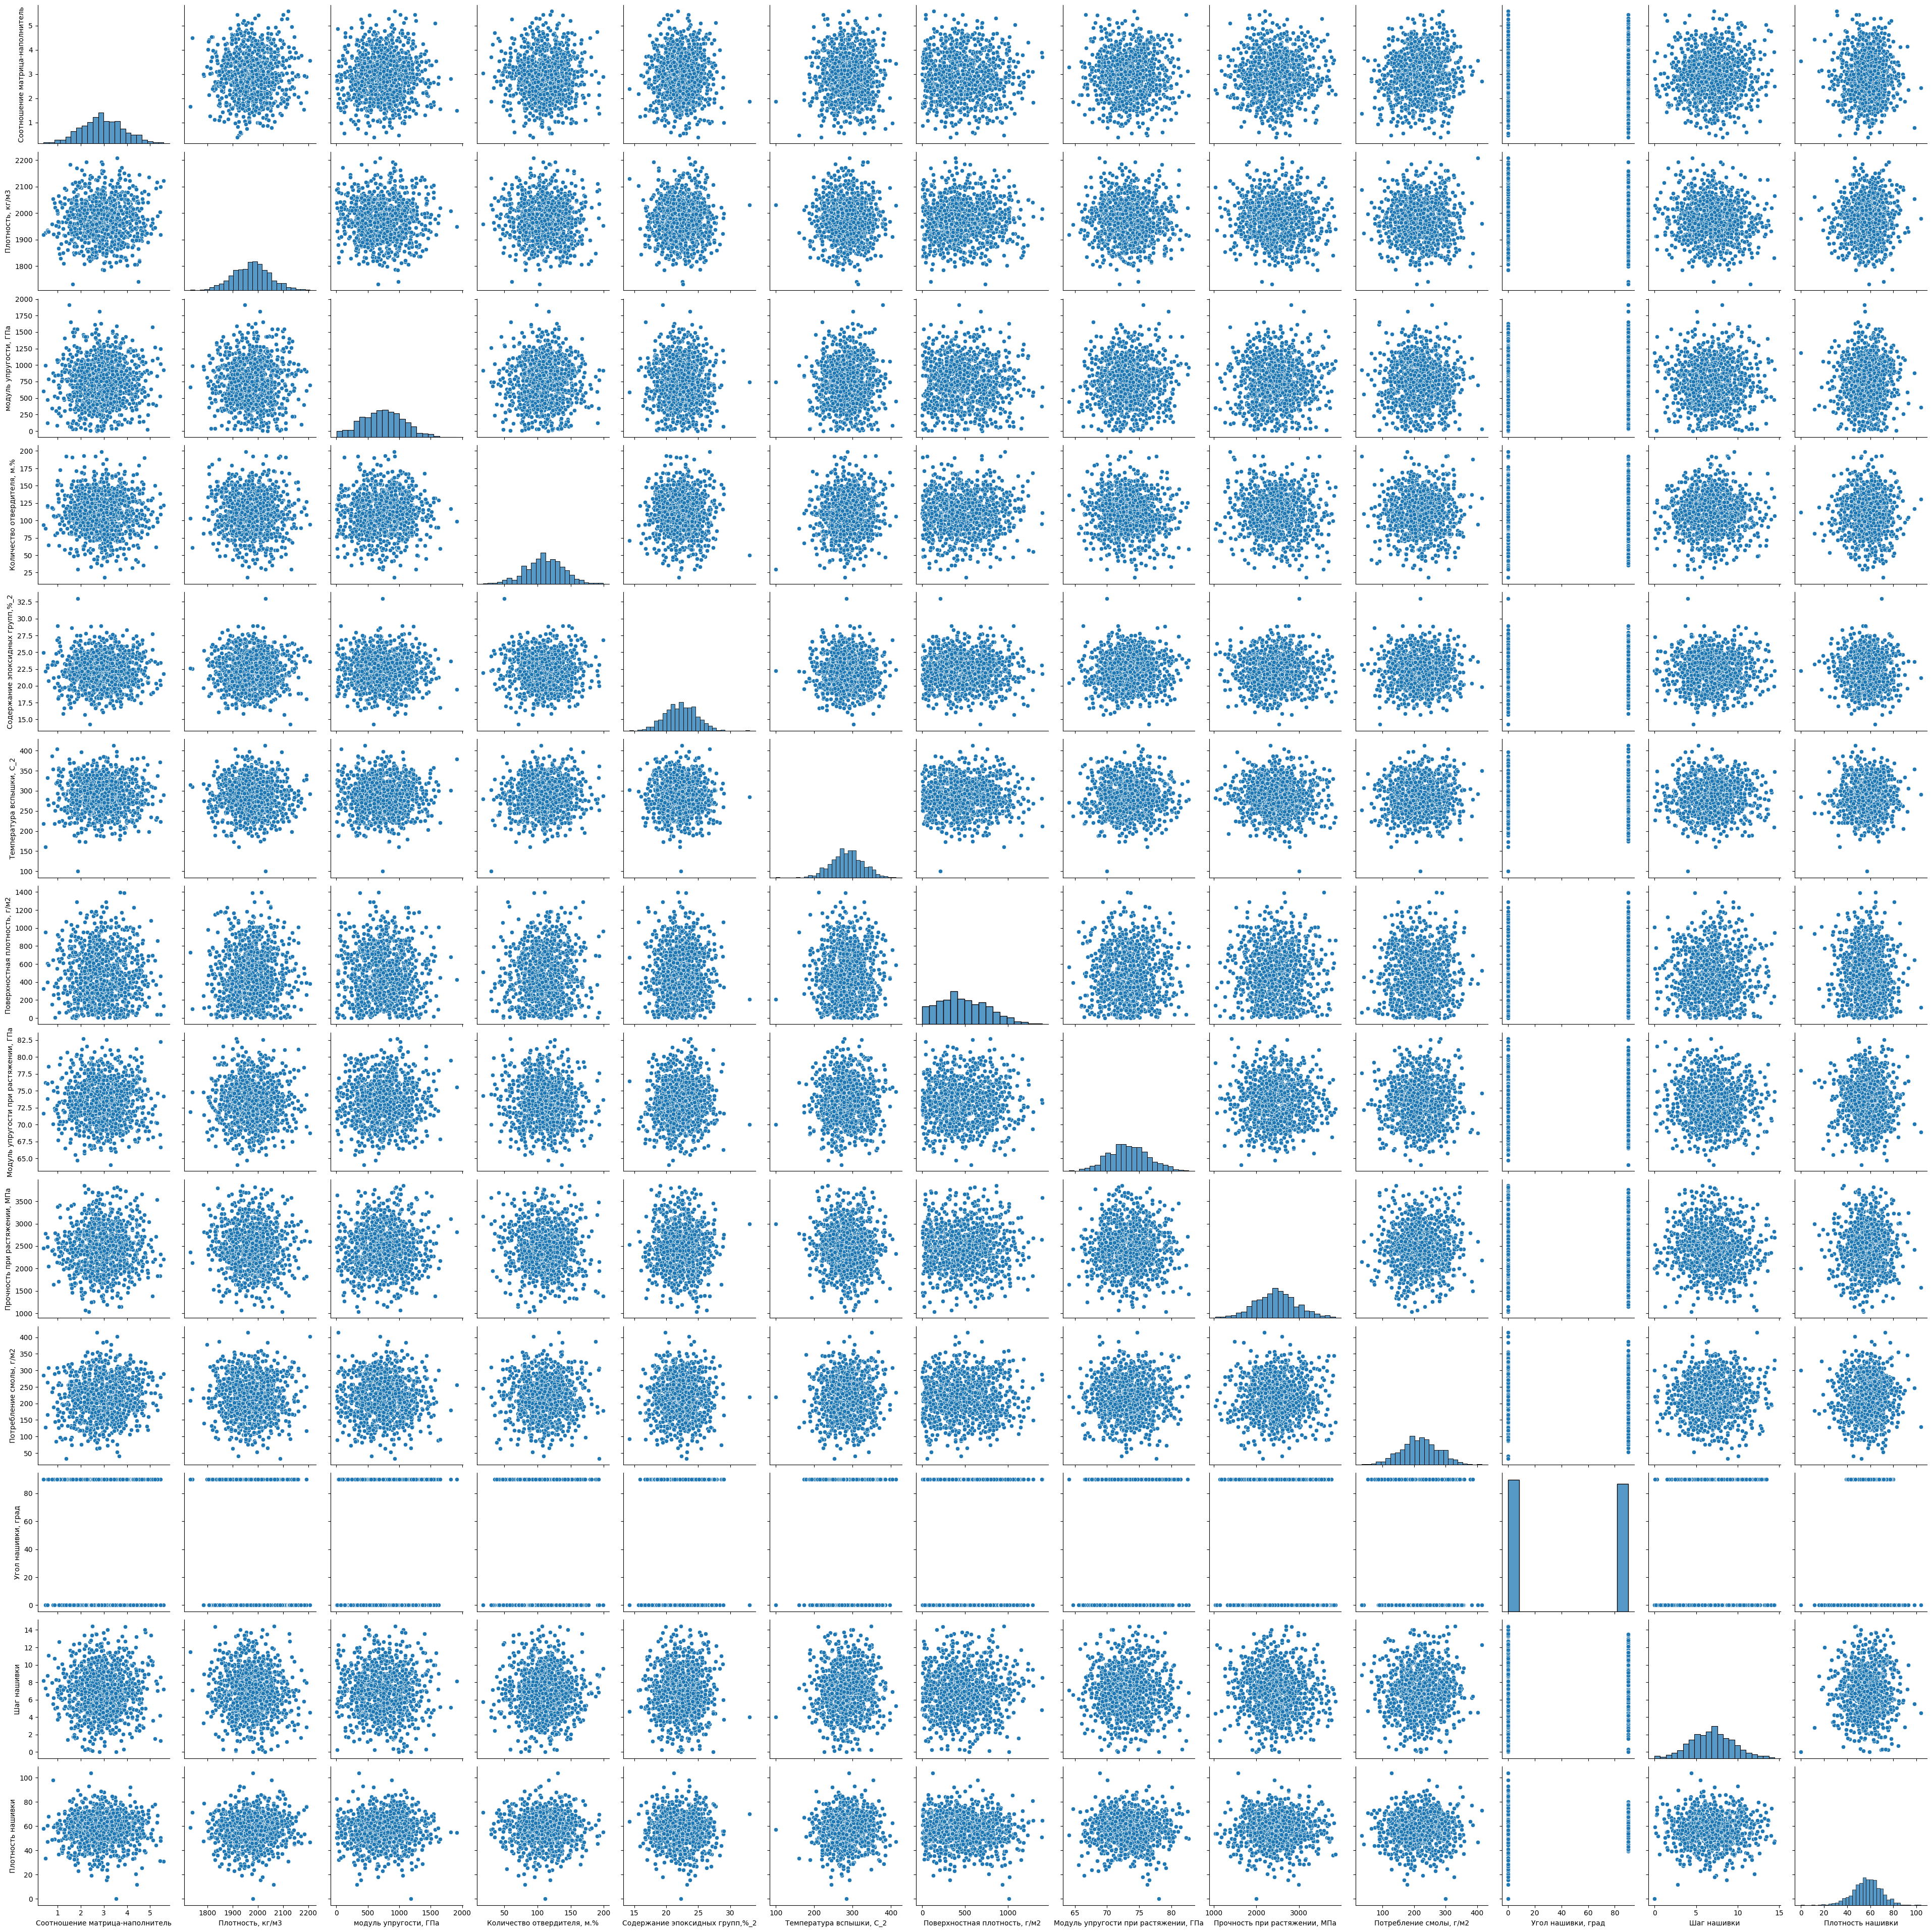

In [ ]:
# Построю попарные графики рассеяния
sns.pairplot(df, height=3);

По графикам видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.

Найду выбросы.

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. Экспериментирую, как они отработают на данном наборе данных.

Соотношение матрица-наполнитель: 3s=0 iq=6


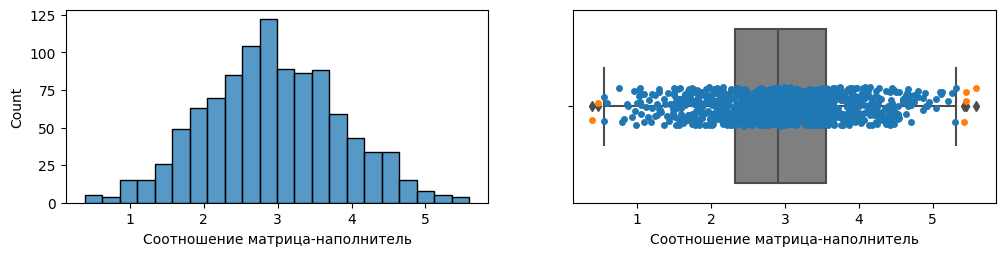

Плотность, кг/м3: 3s=3 iq=9


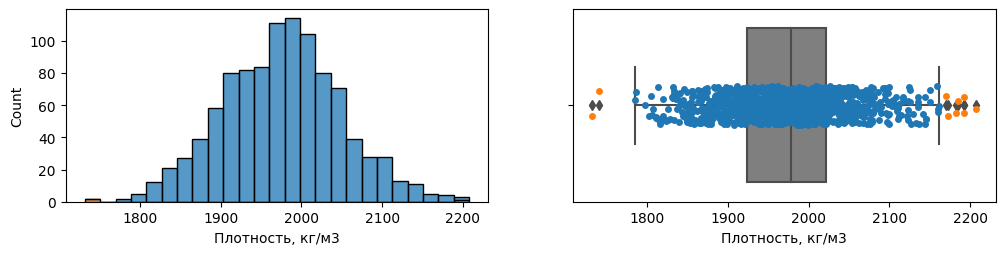

модуль упругости, ГПа: 3s=2 iq=2


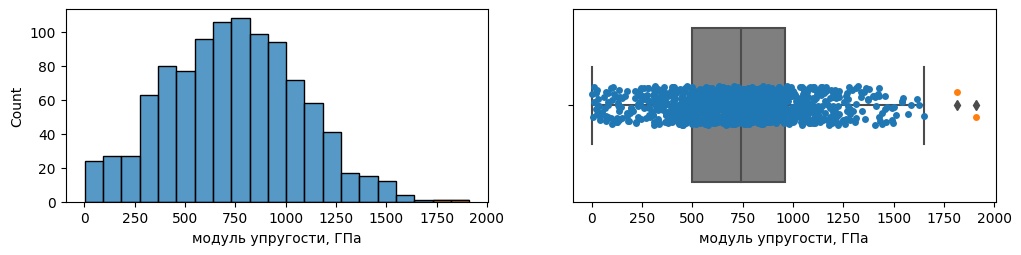

Количество отвердителя, м.%: 3s=2 iq=14


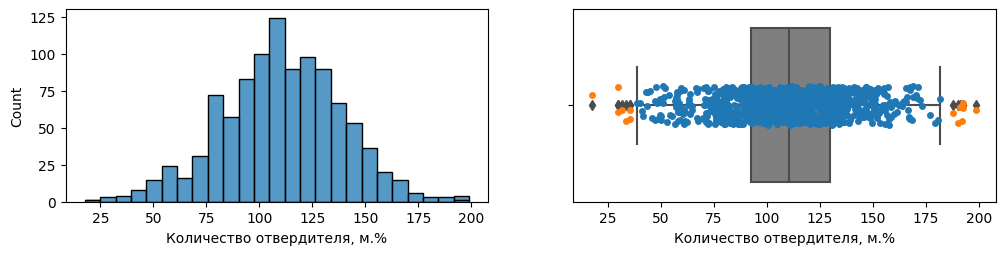

Содержание эпоксидных групп,%_2: 3s=2 iq=2


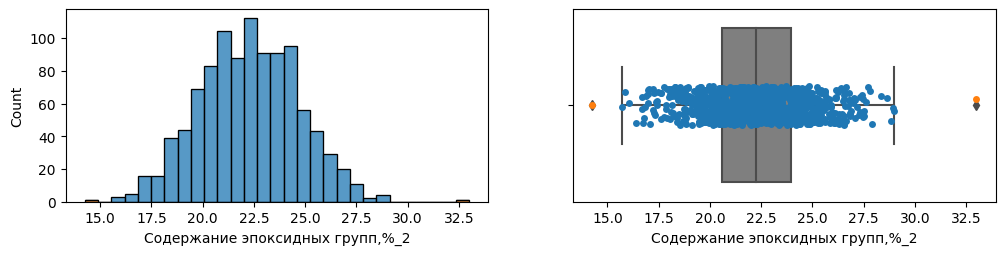

Температура вспышки, С_2: 3s=3 iq=8


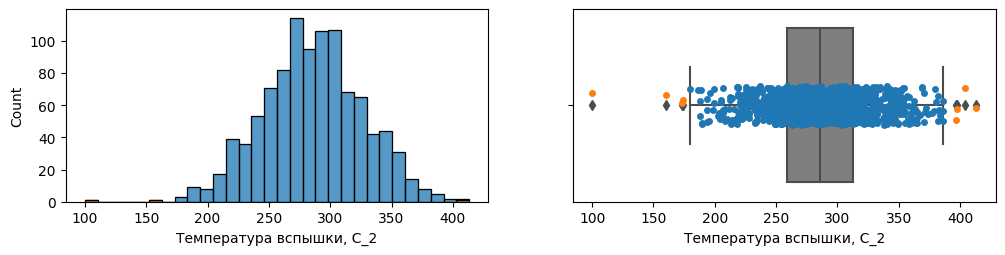

Поверхностная плотность, г/м2: 3s=2 iq=2


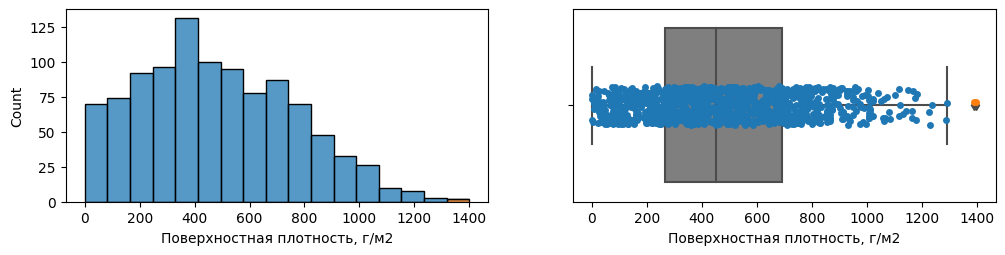

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


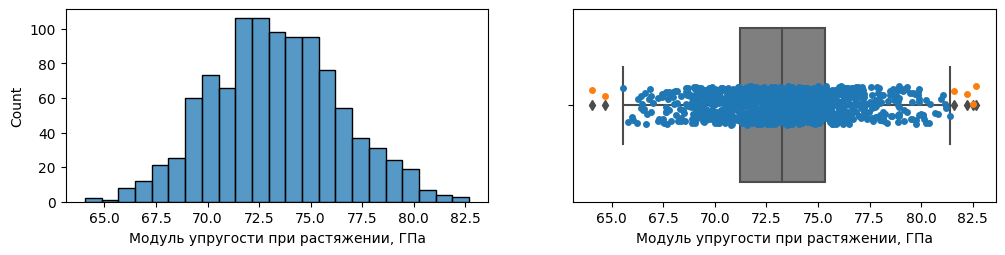

Прочность при растяжении, МПа: 3s=0 iq=11


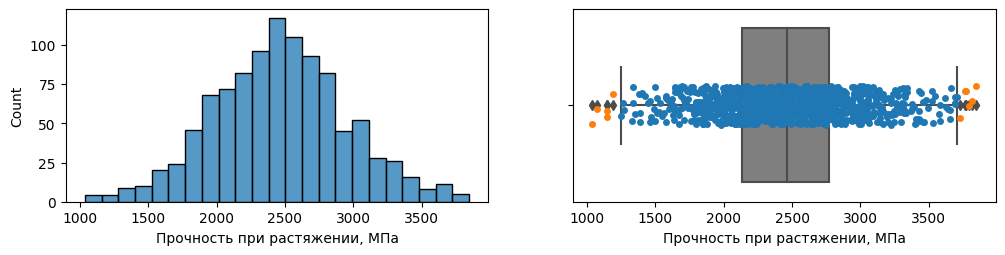

Потребление смолы, г/м2: 3s=3 iq=8


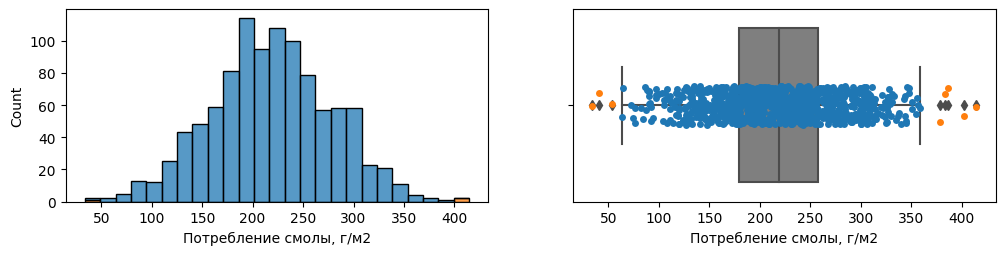

Угол нашивки, град: 3s=0 iq=0


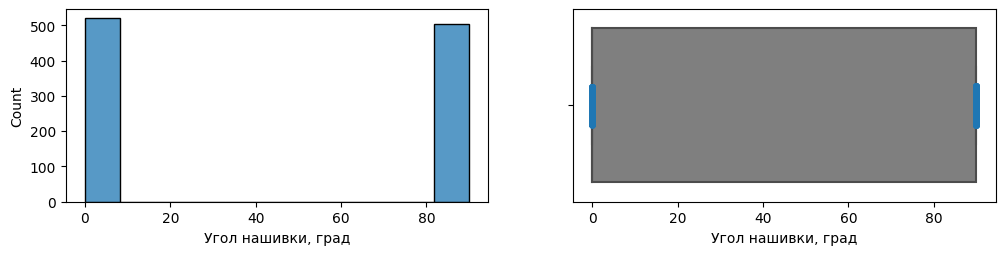

Шаг нашивки: 3s=0 iq=4


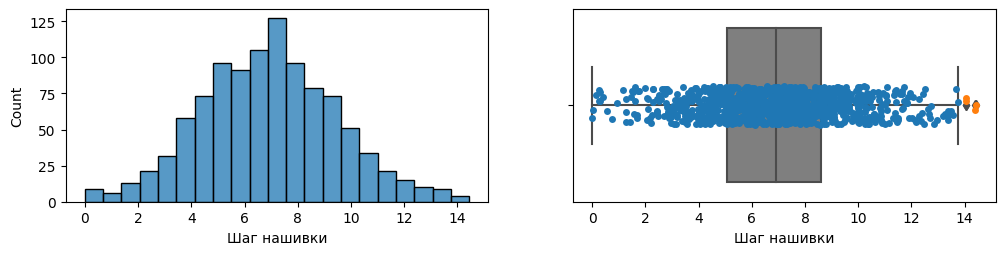

Плотность нашивки: 3s=7 iq=21


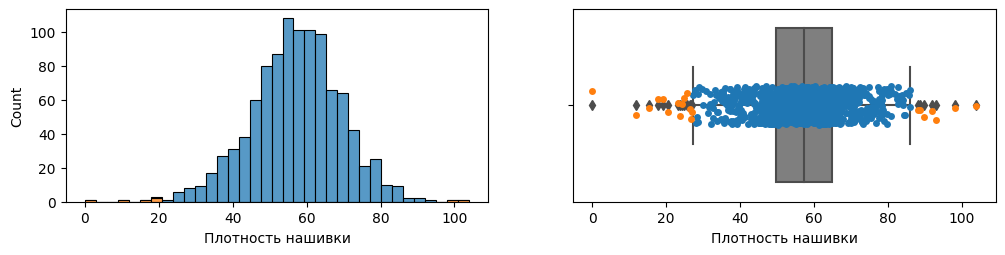

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [21]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

На сырых данных испоьзую метод межквартильных расстояний, чтоб получить более "чистые" данные. Но раз датасет уже очищен от явного шума, применю метод 3-х сигм, чтобы потерять меньше значимой информации.

In [22]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [24]:
# Очищенные данные тоже стоит сохранить
df.to_excel('data_cleaned.xlsx')

Смущает то, что по внешнему виду графиков мы не видим никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания.

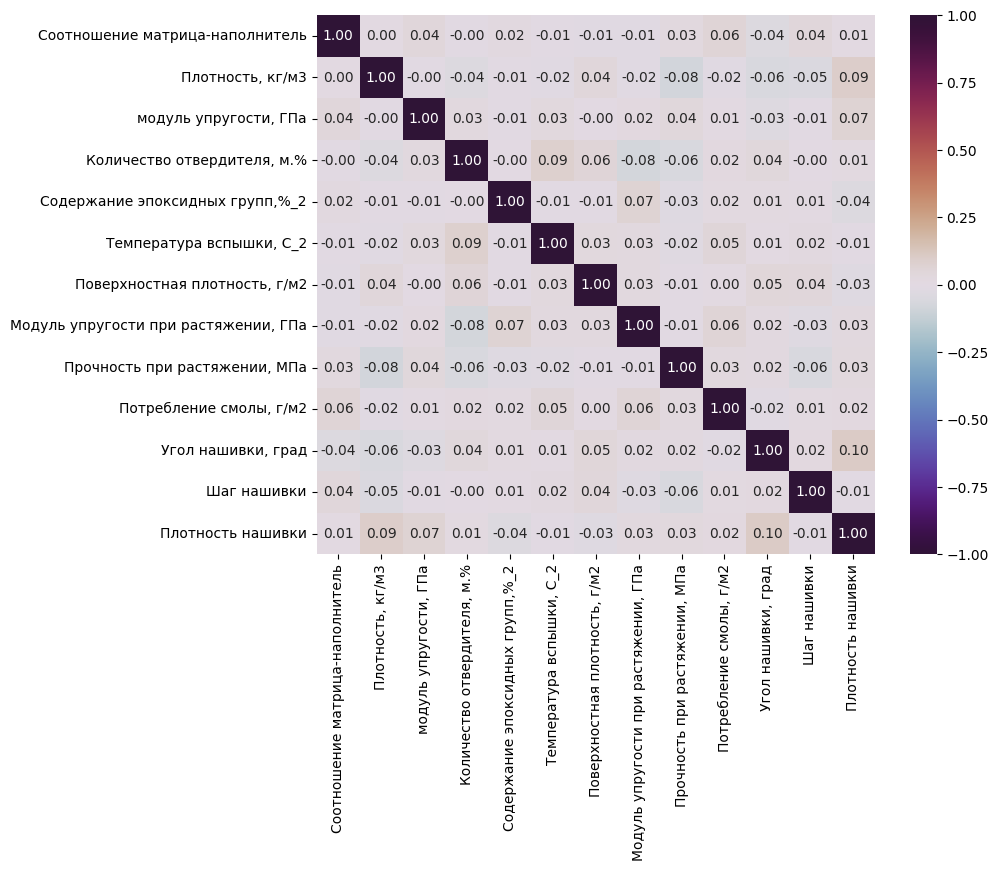

In [25]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

## Обучить нескольких моделей

В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [26]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel('data_cleaned.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

### Разделить данные на входные и выходные признаки

Статистическими методами мы зависимостей не обнаружили. Хорошо бы узнать, какие связи между признаками видит специалист по предметной области. 

Можно предположить, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

В этой работе я понял предметную область и распределила признаки по группам, как показано на рисунке выше.

Для каждого из целевых признаков построю отдельную модель, следовательно решу 3 отдельные задачи.

In [27]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [28]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [29]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [30]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [31]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [32]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение). 


Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [33]:
# Разделю переменные на категориальные и численные
#x_categorical = ['Угол нашивки, град']
#x1_continuous = [column for column in x1_columns if column not in x_categorical]
#x2_continuous = [column for column in x2_columns if column not in x_categorical]
#x3_continuous = [column for column in x3_columns if column not in x_categorical]
x1_continuous = [column for column in x1_columns]
x2_continuous = [column for column in x2_columns]
x3_continuous = [column for column in x3_columns]

In [35]:
# Препроцессор для 1-й задачи
#preprocessor1 = ColumnTransformer(transformers=[
#        ("continuous", StandardScaler(), x1_continuous),
#        ("categorical", OrdinalEncoder(), x_categorical)
#])
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous)
])

In [85]:
# Препроцессор для 2-й задачи
#preprocessor2 = ColumnTransformer(transformers=[
#        ("continuous", StandardScaler(), x2_continuous),
#        ("categorical", OrdinalEncoder(), x_categorical)
#])
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous)
])

preprocessor2_1 = ColumnTransformer(transformers =[
    ("1234", MinMaxScaler(), x2_continuous)
])

In [37]:
# Препроцессор для 3-й задачи
#preprocessor3 = ColumnTransformer(transformers=[
#        ("continuous", StandardScaler(), x3_continuous),
#        ("categorical", OrdinalEncoder(), x_categorical)
#])
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous)
])

In [38]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [39]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [40]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [41]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

In [42]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [43]:
# Выполняю препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [44]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [49]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [46]:
# Описательная статистика входных данных после предобработки
#show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

NameError: ignored

In [59]:
# Описательная статистика выходной переменной
y1_test1 = pd.DataFrame(y1_test)
show_statistics(y1_test1)

In [80]:

# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [81]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [82]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [83]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
839  {'alpha': 900, 'positive': True, 'solver': 'lbfgs'} -2.570002     1

In [ ]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [64]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'alpha': 0.15} -2.567622     1

In [ ]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [65]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
15  {'C': 0.03, 'kernel': 'sigmoid'} -2.57654     1

In [ ]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [66]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params    MAE  rank
8  {'n_neighbors': 19} -2.613     1

In [ ]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [67]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
15   {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 8, 'random_state': 1523, 'splitter': 'random'}   
75    {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 8, 'random_state': 1523, 'splitter': 'random'}   
195        {'criterion': 'poisson', 'max_depth': 1, 'max_features': 8, 'random_state': 1523, 'splitter': 'random'}   

          MAE  rank  
15  -2.562793     1  
75  -2.562793     1  
195 -2.562793     1

In [ ]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [130]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params  \
6  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 1, 'n_estimators': 50, 'random_state': 1523}   

        MAE  rank  
6 -2.583606    10

In [131]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [132]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [133]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

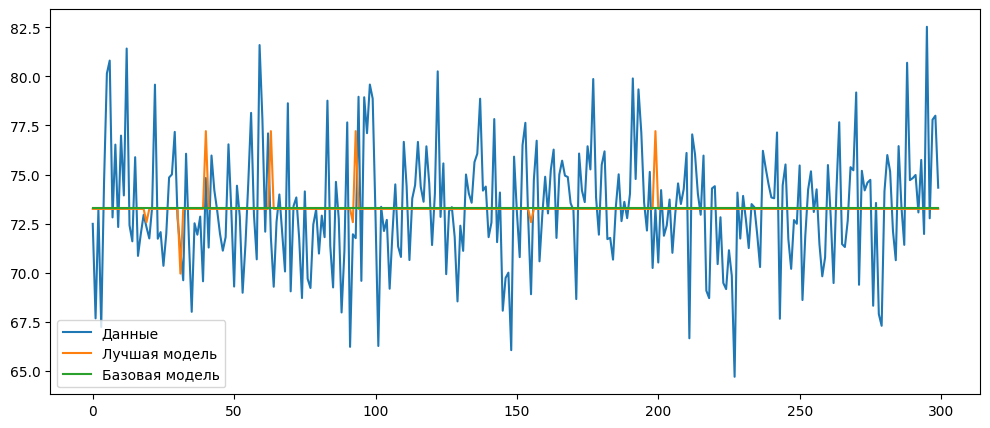

In [134]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [135]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

<ipython-input-135-6daa562fd97f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.000040 -3.010907 -2.327993 -0.031762   
Лучшая модель (дерево решений) -0.023881 -3.046586 -2.359149 -0.032162   

                                max_error  
Базовая модель                  -9.213307  
Лучшая модель (дерево решений)  -9.278179

### Модель для прочности при растяжении, МПа

In [157]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [158]:
# Выполняю препроцессинг входных переменных
x2_train = preprocessor2.fit_transform(x2_train_raw)
x2_test = preprocessor2.transform(x2_test_raw)

In [159]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [165]:

x2_train

array([[-0.4253542 , -1.03056745, -0.60015542, ..., -1.00286124,
         0.0407527 , -0.9038347 ],
       [-0.13151076,  0.12028276,  0.67025102, ..., -1.00286124,
        -0.15821126, -1.55969851],
       [-0.48736963,  0.95187721,  0.6607276 , ...,  0.99714693,
         0.95960556, -0.68645533],
       ...,
       [ 0.40720929,  1.39473938, -1.99405183, ..., -1.00286124,
         0.82290369, -0.13605056],
       [ 1.61883997, -0.40322398, -0.2889377 , ..., -1.00286124,
        -1.22721676, -0.25312012],
       [ 1.12524497,  0.46248743, -0.12219715, ..., -1.00286124,
        -0.39656739,  0.17594137]])

In [144]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [145]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous)))

In [146]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y2_train))

In [164]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [166]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [167]:

# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [168]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
494  {'alpha': 990, 'solver': 'sparse_cg'} -380.455139     1

In [169]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [170]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
5  {'alpha': 30} -379.636958     1

In [171]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [172]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
3  {'C': 0.001, 'kernel': 'poly'} -379.804361     1

In [173]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [174]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
129   {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 5, 'random_state': 1523, 'splitter': 'random'}   
131   {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 6, 'random_state': 1523, 'splitter': 'random'}   
133   {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 7, 'random_state': 1523, 'splitter': 'random'}   
135   {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 8, 'random_state': 1523, 'splitter': 'random'}   
137   {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 9, 'random_state': 1523, 'splitter': 'random'}   
139  {'criterion': 'absolute_error', 'max_depth': 1, 'max_features': 10, 'random_state': 1523, 'splitter': 'random'}   

            MAE  rank  
129 -377.725205     1  
131 -377.725205     1  
133 -377.725205     1  
135 -377.725205     1  
137 -377.725205     1  
139 -377.725205     1

In [175]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [176]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
54  {'loss': 'absolute_error', 'max_depth': 2, 'max_features': 5, 'n_estimators': 50, 'random_state': 1523}   

           MAE  rank  
54 -382.059301     1

In [189]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовал несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовал GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [178]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [187]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=2, max_features=5, n_estimators=50, random_state=RANDOM_STATE)
#best_model2 = Lasso(alpha = 30)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

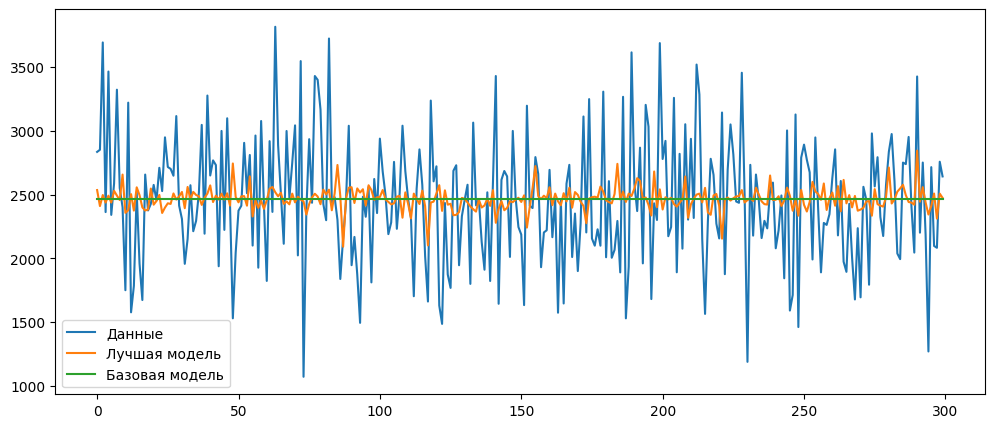

In [188]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [190]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

<ipython-input-190-037aad50d035>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))


R2        RMSE         MAE  \
Базовая модель                      -0.000906 -493.876651 -389.638305   
Лучшая модель (градиентный бустинг)  0.007566 -491.782058 -386.188516   

                                         MAPE    max_error  
Базовая модель                      -0.173049 -1398.198417  
Лучшая модель (градиентный бустинг) -0.170938 -1376.162597

### Модель для соотношения матрица-наполнитель

In [191]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [192]:
# Выполняю препроцессинг входных переменных
x3_train = preprocessor3.fit_transform(x3_train_raw)
x3_test = preprocessor3.transform(x3_test_raw)

In [193]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [ ]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [ ]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [ ]:
# Описательная статистика выходной переменной
show_statistics(y3_train)

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [194]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [195]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [196]:
from sklearn.neural_network import MLPRegressor

In [197]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [198]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 4.49969521
Validation score: -8.654600
Iteration 2, loss = 4.06363686
Validation score: -7.670527
Iteration 3, loss = 3.61096211
Validation score: -6.647884
Iteration 4, loss = 3.13763332
Validation score: -5.579533
Iteration 5, loss = 2.65039991
Validation score: -4.481927
Iteration 6, loss = 2.15160150
Validation score: -3.385010
Iteration 7, loss = 1.66282074
Validation score: -2.310275
Iteration 8, loss = 1.19806508
Validation score: -1.316943
Iteration 9, loss = 0.79421897
Validation score: -0.533594
Iteration 10, loss = 0.52084378
Validation score: -0.117945
Iteration 11, loss = 0.44803101
Validation score: -0.103991
Iteration 12, loss = 0.53205773
Validation score: -0.214774
Iteration 13, loss = 0.58565704
Validation score: -0.172960
Iteration 14, loss = 0.53133367
Validation score: -0.067302
Iteration 15, loss = 0.45583883
Validation score: -0.039301
Iteration 16, loss = 0.41053974
Validation score: -0.082142
Iteration 17, loss = 0.40910616
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=1523, validation_fraction=0.3, verbose=True)

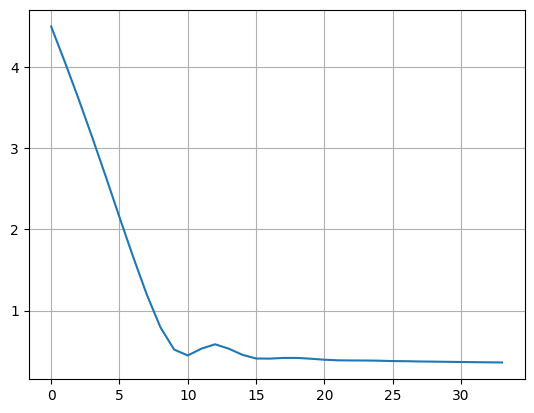

In [199]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [200]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

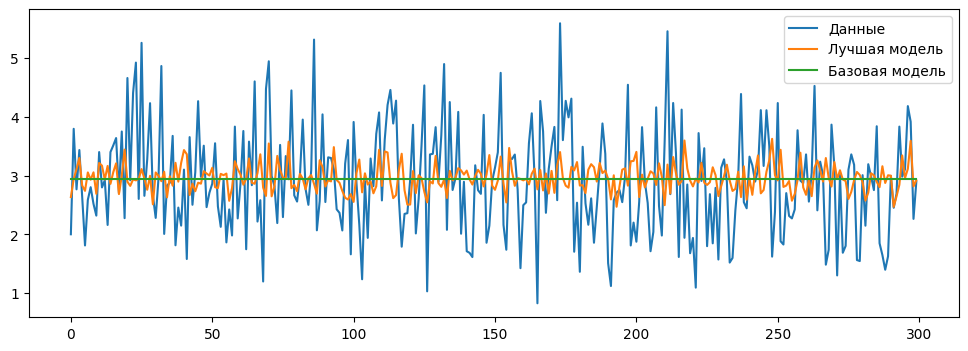

In [201]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [202]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

<ipython-input-202-b90b8dd5e205>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))


R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.002099 -0.903797 -0.721432 -0.298287  -2.643033
MLPRegressor   -0.036773 -0.919300 -0.738770 -0.303959  -2.454872

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [ ]:
# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [203]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [204]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [205]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [206]:
# Собираю нейросеть
model3_2 = construct_model()

In [207]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [208]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

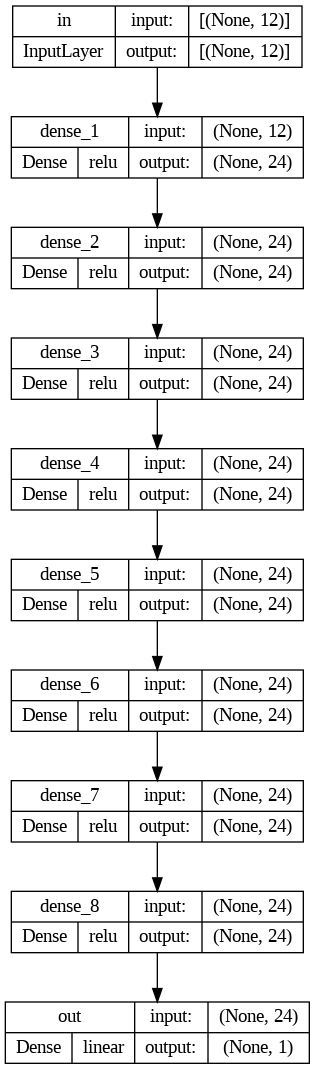

In [209]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [210]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 2s 23ms/step - loss: 94.1554 - root_mean_squared_error: 2.9306 - val_loss: 81.0159 - val_root_mean_squared_error: 2.6765
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 58.5056 - root_mean_squared_error: 2.0725 - val_loss: 44.8435 - val_root_mean_squared_error: 1.3137
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 37.7032 - root_mean_squared_error: 1.2606 - val_loss: 41.6528 - val_root_mean_squared_error: 1.3371
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 33.6660 - root_mean_squared_error: 1.1481 - val_loss: 41.9515 - val_root_mean_squared_error: 1.1988
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 31.5226 - root_mean_squared_error: 1.0706 - val_loss: 40.3556 - val_root_mean_squared_error: 1.2229
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 30.1472 - root_mean_squared_error: 1.0314 - val_loss: 41.6993 - val

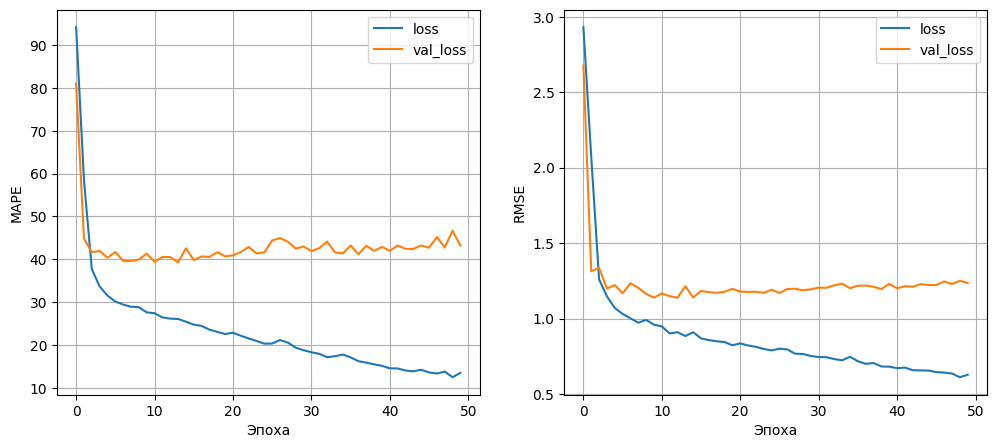

In [211]:
plot_loss(history.history)

In [212]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 34.1035 - root_mean_squared_error: 1.1303


[34.103546142578125, 1.1303046941757202]

In [213]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 4ms/step


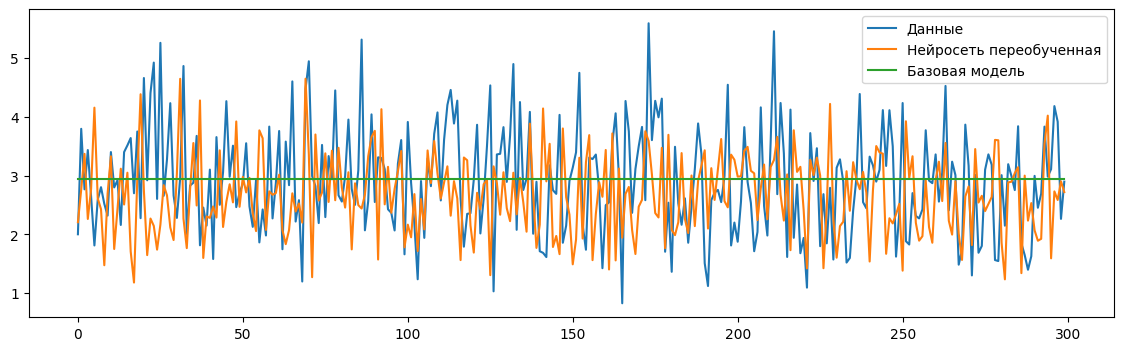

In [214]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [215]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [216]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 2s 18ms/step - loss: 99.3552 - root_mean_squared_error: 3.0565 - val_loss: 97.3909 - val_root_mean_squared_error: 3.0562
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 94.8501 - root_mean_squared_error: 2.9462 - val_loss: 88.4879 - val_root_mean_squared_error: 2.8473
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 74.9233 - root_mean_squared_error: 2.4558 - val_loss: 46.2769 - val_root_mean_squared_error: 1.7147
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 37.2362 - root_mean_squared_error: 1.2443 - val_loss: 38.0714 - val_root_mean_squared_error: 1.1998
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 31.8161 - root_mean_squared_error: 1.1310 - val_loss: 37.6863 - val_root_mean_squared_error: 1.1661
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 30.9783 - root_mean_squared_error: 1.0264 - val_loss: 36.9786 - val

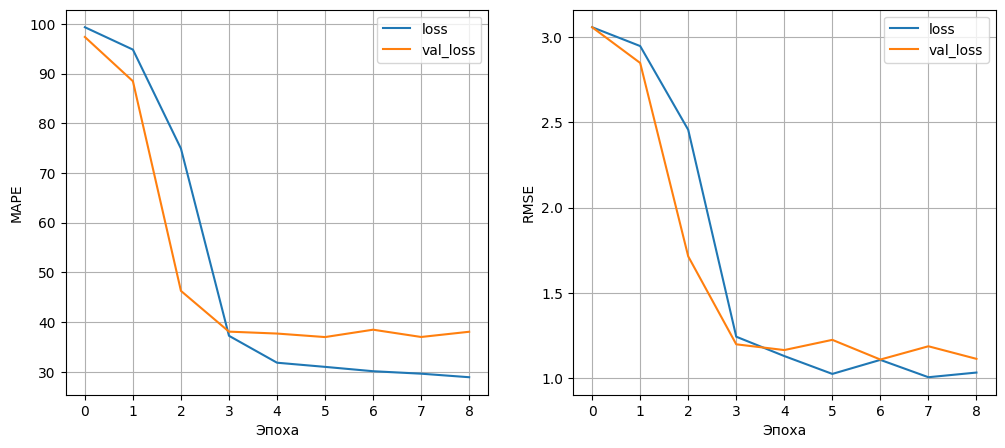

In [217]:
plot_loss(history.history)

In [218]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 30.0577 - root_mean_squared_error: 1.0222


[30.057723999023438, 1.0222066640853882]

In [219]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


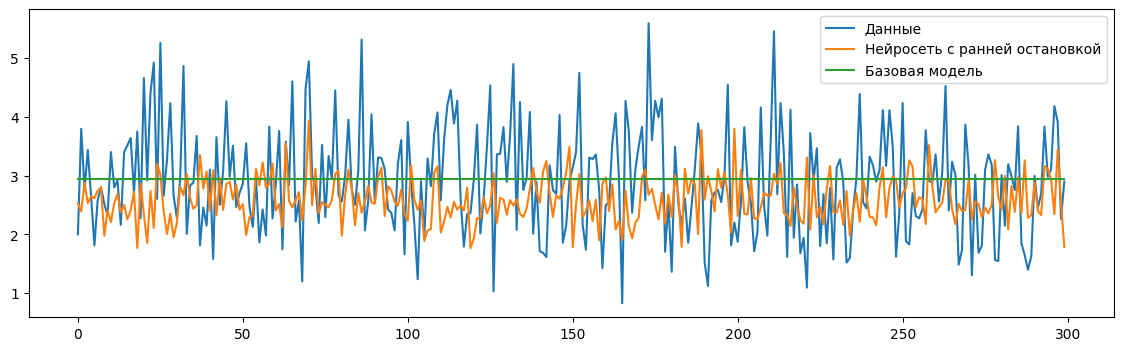

In [220]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [221]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [222]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [223]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [224]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 3s 31ms/step - loss: 93.4524 - root_mean_squared_error: 2.9053 - val_loss: 81.0123 - val_root_mean_squared_error: 2.6789
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 62.4783 - root_mean_squared_error: 2.1366 - val_loss: 42.3819 - val_root_mean_squared_error: 1.4052
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 39.5022 - root_mean_squared_error: 1.3191 - val_loss: 40.5128 - val_root_mean_squared_error: 1.4298
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 35.9304 - root_mean_squared_error: 1.3161 - val_loss: 39.5055 - val_root_mean_squared_error: 1.2579
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 33.7588 - root_mean_squared_error: 1.1922 - val_loss: 38.6098 - val_root_mean_squared_error: 1.2359
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 31.5071 - root_mean_squared_error: 1.1541 - val_loss: 38.1002 - va

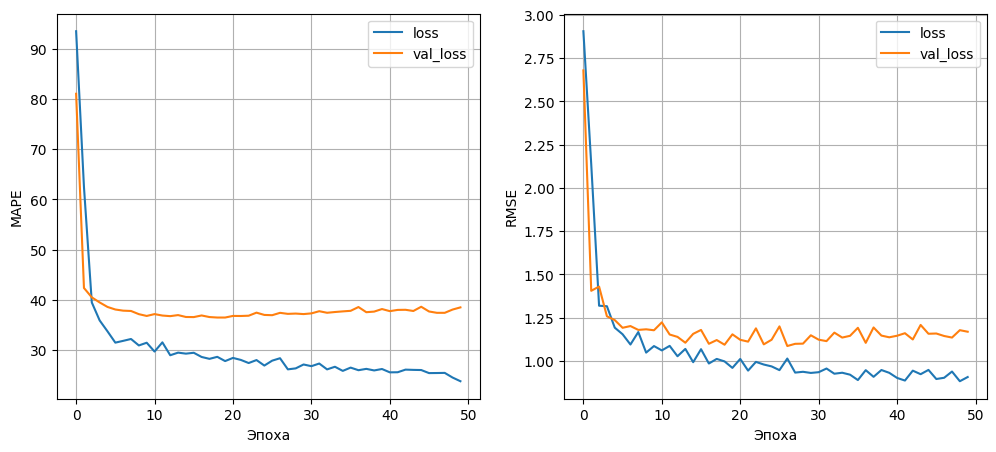

In [225]:
plot_loss(history.history)

In [226]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 29.8476 - root_mean_squared_error: 1.0695


[29.84758758544922, 1.069453239440918]

In [227]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


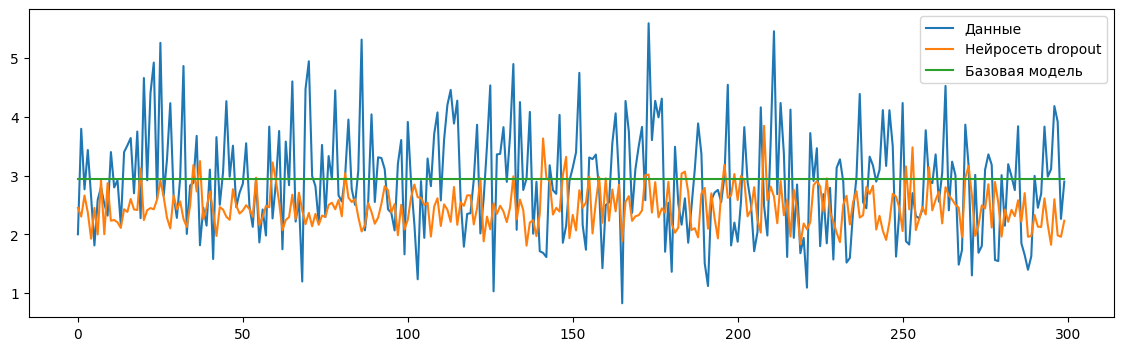

In [228]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [229]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

<ipython-input-229-78960c5a1527>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
<ipython-input-229-78960c5a1527>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
<ipython-input-229-78960c5a1527>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))


R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.002099 -0.903797 -0.721432 -0.298287   
Нейросеть переобученная       -0.567330 -1.130305 -0.921271 -0.341035   
Нейросеть с ранней остановкой -0.281878 -1.022207 -0.823837 -0.300577   
Нейросеть dropout             -0.403114 -1.069453 -0.857793 -0.298476   

                               max_error  
DummyRegressor                 -2.643033  
Нейросеть переобученная        -3.228998  
Нейросеть с ранней остановкой  -2.945963  
Нейросеть dropout              -3.265472

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже» и красиво, но метрики разочаровывают. Лучшая обобщающая спрособность и меньшие значения ошибок на тестовом множестве оказались у нейросети, обученной с ранней остановкой. Но она тоже предсказывает гораздо хуже базовой модели.

## Оценить точность модели на тренировочном и тестовом датасете

In [230]:
## Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=1523, splitter='random')

In [231]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.019383 -3.123984 -2.534591 -0.034619   
Модуль упругости, тестовый      -0.023881 -3.046586 -2.359149 -0.032162   

                                 max_error  
Модуль упругости, тренировочный  -9.434457  
Модуль упругости, тестовый       -9.278179

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [232]:
## Модель для прочности при растяжении
best_model2

GradientBoostingRegressor(max_depth=2, max_features=5, n_estimators=50,
                          random_state=1523)

In [233]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.176021 -436.481311 -348.340635   
Прочность при растяжении, тестовый       0.007566 -491.782058 -386.188516   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.152382 -1330.869379  
Прочность при растяжении, тестовый      -0.170938 -1376.162597

Градиентный бустинг - это прекрасный метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

In [234]:
## Модель для соотношения матрица-наполнитель
model3_3

In [235]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 2ms/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.244610 -1.015638 -0.808404   
Соотношение матрица-наполнитель, тестовый      -0.281878 -1.022207 -0.823837   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.313681  -2.748283  
Соотношение матрица-наполнитель, тестовый      -0.300577  -2.945963

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [236]:
def save_object_with_pickle(obj, obj_name):
  filename = obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [238]:
def load_object_with_pickle(obj_name):
  filename = obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [239]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [240]:
save_object_with_pickle(best_model1, 'model1_best')

In [241]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [242]:
save_object_with_pickle(best_model2, 'model2_best')

In [243]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [244]:
save_object_with_pickle(model3_1, 'model3_1')

In [252]:
model3_2.save('model3_2/')

In [251]:
model3_3.save('model3_3/')

IsADirectoryError: ignored

In [253]:
model3_4.save('/model3_4/')

In [ ]:
# Проверяю загрузку

In [246]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=1523, splitter='random')

In [248]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

GradientBoostingRegressor(max_depth=2, max_features=5, n_estimators=50,
                          random_state=1523)

In [249]:
preprocessor3 = load_object_with_pickle('preprocessor3')
model3_1 = load_object_with_pickle('model3_1')
model3_1

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=1523, validation_fraction=0.3, verbose=True)

In [254]:
model3_2 = keras.models.load_model('/model3_2/')
model3_2

In [256]:
model3_3 = keras.models.load_model('model3_3/')
model3_3

In [257]:
model3_4 = keras.models.load_model('/model3_4/')
model3_4

In [ ]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [258]:
# Вход
x1.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [259]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

array([73.24759433])

In [260]:
# Вход
x2.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [261]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

array([2552.95950961])

In [ ]:
# Примеры для тестирования модели в приложении для задачи 3

In [262]:
# Вход
x3.iloc[19, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [263]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_1.predict(sample_x)

array([2.75215138])